In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt

In [2]:
from ram.analysis.run_manager import RunManager
from ram.analysis.model_selection.combo_search import CombinationSearch
from ram.analysis.statistics import get_stats, rollup_returns

In [3]:
RunManager.get_run_names('StatArbStrategy')

,RunName,RunDate,Completed,Description
0,run_0068,2018-03-06,True,"Sector 20, version 002"
1,run_0069,2018-03-07,True,"Sector 20, version 2 rerun with univ filtering"
2,run_0070,2018-03-19,True,"Sector 20, post refactor run"
3,run_0071,2018-03-21,True,"Sector 20, 2001 start date, 16cpu comp"
4,run_0072,2018-03-21,True,"Sector 20, 2001 start date, 64cpu comp"
5,run_0078,2018-04-18,True,"Sector 20, new pricing data"
6,run_0079,2018-04-25,True,Rerun with data since 2004
7,run_0080,2018-04-26,False,Rerun of version 24 data
8,run_0081,2018-04-30,True,New hyperparams
9,run_0085,2018-05-01,True,"new params, longer params/hyperparms"


#### Document last run date

In [4]:
print('TIMESTAMP for last run of this script:')
print(dt.datetime.utcnow())

TIMESTAMP for last run of this script:
2018-05-08 19:35:59.451773


#### Current runs for implementation

In [5]:
runs = [
    'run_0090'
]

#### Check that all run files are up-to-date

In [6]:
for r in runs:
    run = RunManager('StatArbStrategy', r, test_periods=0)
    run.import_return_frame()
    print('{} - {}'.format(r, run.returns.index[-1]))

run_0090 - 2018-05-07 00:00:00


#### Import

In [14]:
comb = CombinationSearch(write_flag=True)
comb.set_selection_criteria('sharpe')
comb.params['training_epochs'] = 20

for r in runs:
    comb.add_run(RunManager('StatArbStrategy', r, 
                            test_periods=0, start_year=2009))

In [15]:
comb.start()

Reading and aggregating runs...
Finished aggregating runs...

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Writing run as: CombinationSearch_20180508194357
Max date: 2018-05-07
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~



100%|██████████| 20/20 [09:36<00:00, 28.48s/it]


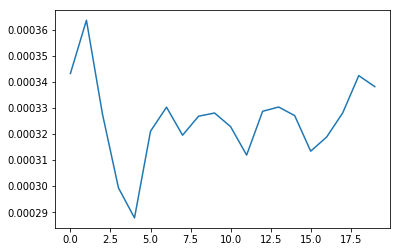

In [16]:
plt.figure()
plt.plot(comb.epoch_stats.Mean)
plt.show()

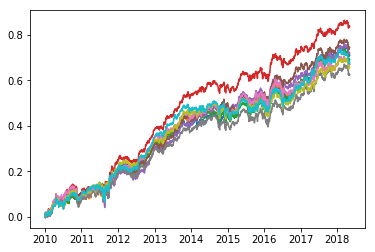

In [17]:
plt.figure()
plt.plot(comb.best_results_returns.cumsum())
plt.show()

In [18]:
df = rollup_returns(comb.best_results_returns)
df['year'] = df.sum(axis=1)
df

Qtr,1,2,3,4,year
Year,,,,,
2009,NaN,NaN,NaN,NaN,NaN
2010,0.056726,-0.008168,0.075050,-0.042618,0.080990
2011,0.027899,0.022368,-0.029198,0.097351,0.118420
2012,0.025058,-0.011794,0.032320,0.074357,0.119941
2013,-0.004928,0.041700,0.049679,-0.000727,0.085723
2014,0.014702,0.021325,-0.019860,0.022746,0.038913
2015,0.005924,0.064162,-0.011866,0.018510,0.076730
2016,0.054242,-0.038278,-0.004013,0.047928,0.059879
2017,0.031707,0.086836,0.017514,0.000949,0.137005


In [19]:
df.year.iloc[:-1].mean()

0.089700065186127054